## Importing the libraries

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from astropy.io import ascii

## Importing the dataset

In [57]:
from Preprocessor4 import get_combined_dataset
from Preprocessor4 import get_single_dataset
training_set = get_combined_dataset("training_data/Typ2_intrapoliert/training", 4, 12)
X_train = training_set.iloc[:, 2:].values
y_train = training_set.iloc[:, 1].values
test_set = get_combined_dataset("training_data/Typ1_intrapoliert/test", 1, 3)
X_test = test_set.iloc[:, 2:].values
y_test = test_set.iloc[:, 1].values

## Training the Multiple Linear Regression model

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results on independent test set

In [59]:
y_pred = regressor.predict(X_test)

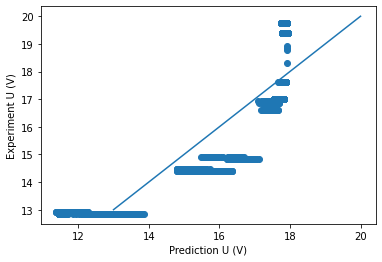

In [60]:
plt.scatter(y_pred, y_test)
plt.xlabel("Prediction U (V)")
plt.ylabel("Experiment U (V)")
plt.plot([13, 20], [13, 20])
plt.show()

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.642954508753593

In [62]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

1.1699919852936418


In [63]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

105.95125998999961


In [64]:
ascii.write([y_test, y_pred], 'mlin_u_train2test1_originalH2.dat', names=['y_test', 'y_pred'], overwrite=True)